In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

4
WARN: <class 'wrappers.AtariResetLive'> doesn't implement 'reset' method, which is required for wrappers derived directly from Wrapper. Deprecated default implementation is used.
done


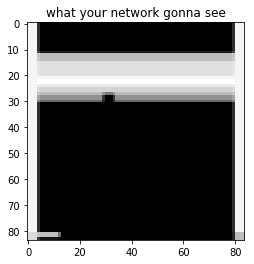

In [3]:
from wrappers import make_env
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name = "BreakoutDeterministic-v4"
env = make_env(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[0,:,:],interpolation='none',cmap='gray');

In [4]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

dqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 10,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DQN',
    'IS_DOUBLE' : False,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
ddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-3,
    'STEPS_PER_EPOCH' : 10,
    'EPSILON' : 0.5,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS' : 10**5,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDQN',
    'IS_DOUBLE' : True,
    'IS_DUELING' : True,
    'DUELING_TYPE' : 'AVERAGE'
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
env.reset()
agent.train()

0
0.666666666667
40.6666666667
500
0.0
22.0
1000
0.0
22.0
1500
0.0
22.0
2000
1.33333333333
66.3333333333
2500
0.0
22.0
3000
0.0
22.0
3500
1.66666666667
86.3333333333
4000
1.66666666667
85.0
4500
1.0
57.0
5000
1.0
50.0
5500
1.0
50.0
6000
1.0
50.0
6500
2.66666666667
129.333333333
7000
0.333333333333
31.3333333333
7500
1.0
57.0
8000
0.666666666667
40.6666666667
8500
0.666666666667
40.6666666667
9000
0.666666666667
40.6666666667
9500
1.33333333333
71.6666666667
10000
1.0
50.0
10500
1.0
63.0
11000
1.33333333333
66.3333333333
11500
2.33333333333
111.0
12000
1.33333333333
71.6666666667
12500
1.0
57.0
13000
0.666666666667
40.6666666667
13500
0.666666666667
47.6666666667
14000
1.0
57.0
14500
1.0
50.0
15000
1.0
56.0
15500
1.66666666667
95.6666666667
16000
0.333333333333
31.3333333333
16500
2.66666666667
131.333333333
17000
0.666666666667
53.0
17500
1.0
63.0
18000
2.0
98.3333333333
18500
2.0
93.0
19000
2.66666666667
131.0
19500
0.666666666667
40.6666666667
20000
1.0
50.0


In [ ]:
#agent.epsilon = 0.2
#agent.train()

In [ ]:
from wrappers import make_env_with_monitor
print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=1000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)


import gym.wrappers
env_monitor = make_env_with_monitor(env_name, 'video8')
sessions = [evaluate(env_monitor) for _ in range(1)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()